In [ ]:
# Ottawa dane nieruchomości pod wynajem krótkoterminowy patrzymy na:wsp.g eograficzne kwatery/pokoju pomijamy kwestie ceny udogodnien itd..

In [ ]:
# Założenia do analizy

In [ ]:
# Sprawdzamy położenie geograficzne i sprawdzamy czy da sie te kwatery podzielić na mniejsze grupy nie wiemy na tym etapie
# ile ich bedzie ani jak się będą nazywały.
# Koło każdego meiszkania ma być serwis pan złota rączka od napraw w domu,który szybko usunie awarie.
# współrzędne geograficzne i odległość w linii prostej od serwisu.
# https://scikit-learn.org/stable/machine_learning_map.html

In [ ]:
# Użyjemy agorytmu Kmeans

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv(r"C:\Dane\2_ML_Projekty\004_ML kurs 001 regresja bazy\Airbnb+listings+in+Ottawa+(May+2016)\Airbnb listings in Ottawa (May 2016).csv")

In [5]:
df.head()

,Unnamed: 0,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,25468,106030,Private room,NaN,BEACON HILL-CYRVILLE,8,4.5,2,1.0,NaN,29.0,2.0,45.450053,-75.589091,2016-05-16 23:47:32.757633
1,1,34220,147438,Private room,NaN,CAPITAL,0,NaN,2,1.0,1.0,161.0,7.0,45.409237,-75.678999,2016-05-16 23:14:17.559013
2,2,36642,157787,Private room,NaN,KITCHISSIPPI,60,4.5,2,1.0,NaN,56.0,1.0,45.401591,-75.746794,2016-05-16 23:12:51.307224
3,3,42100,184023,Private room,NaN,GLOUCESTER-SOUTH NEPEAN,0,NaN,1,1.0,2.0,31.0,1.0,45.320071,-75.607080,2016-05-16 22:58:04.288813
4,4,59258,284351,Entire home/apt,NaN,BAY,1,NaN,4,1.0,1.0,128.0,3.0,45.358996,-75.803144,2016-05-17 00:11:06.877538


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1496 non-null   int64  
 1   room_id               1496 non-null   int64  
 2   host_id               1496 non-null   int64  
 3   room_type             1496 non-null   object 
 4   borough               0 non-null      float64
 5   neighborhood          1496 non-null   object 
 6   reviews               1496 non-null   int64  
 7   overall_satisfaction  738 non-null    float64
 8   accommodates          1496 non-null   int64  
 9   bedrooms              1495 non-null   float64
 10  bathrooms             1165 non-null   float64
 11  price                 1496 non-null   float64
 12  minstay               1436 non-null   float64
 13  latitude              1496 non-null   float64
 14  longitude             1496 non-null   float64
 15  collected            

In [ ]:
# Załadowaliśmy dane

In [ ]:
# Tworzymy zmienną coordinates bo zależny nam na danych geograficznych.

In [7]:
coordinates =  df.loc[:,['longitude', 'latitude']]
coordinates.shape

(1496, 2)

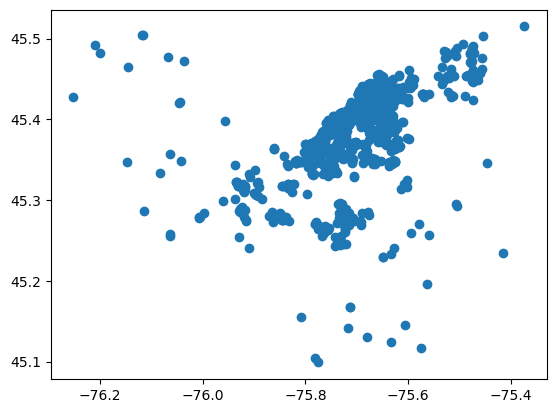

In [10]:
plt.scatter(df.loc[:,'longitude'], df.loc[:, 'latitude'])
plt.show()

In [ ]:
# Duża centralna grupa na wykresie mniejsza po prawej u góry na dole i po lewej równiez dwie grupy

In [ ]:
# My chcemy dostać ten podział w sposób matematyczny. Zasady tego podziału powinny być jasne i logiczne a nie na oko

In [ ]:
# Nie wiemy na ile grup należy podzielić ten zbiór danych. Nie robimy 1400 grup dla 1400 punktów w kazdym mieszkaniu nie będzie meiszkał spec od remontów

In [ ]:
#  Przyjmujemy, że grupy mogą być dwie i tworzymy dwa punkty oraz dla każdego z 1400 punktów policzyly odległosć od tych punktów zwanych centroidami. Przypisujemy punkty do tego centroidu który jest bliżej.
# Centra grup zostały wylosowane więc nei sa dokładne. W koljenym kroku w kazdej grupie wyliczymy środek cięzkości i przeniesiemy tam centroidy. 
# Robimy znowu podzial punktów na grupy licząc ich odległosci..
# Jak ustalone zostana nowe grupy proces wyliczania środka cięzkości będzie można powtórzyć.I tak ciągle. Dla każdego z centrów można wyliczyć sumę 
# odległosci punktów które zostały do niego przypisane to 
# będzie miara jakości tego podziału danych. Liczymy sumę kwadratów odległosci dzieloną przez sume punktów. Within-cluster-sum-of-squares

In [15]:
WCSS = []

In [ ]:
# A moze zrobimy więcej grup a nie dwie. Algorytm wytwarzanai grup będzie pracował w pętli. Wartośc k to ilość grup na kture mamy ochote podzielić dane


In [16]:
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)#budujemy model kmeans z okreslona liczbą klastrów
    kmeans.fit(coordinates)# uczymy algorytm do wyznaczania pozycji centroidow
    WCSS.append(kmeans.inertia_)#wyniki zapisujemy w tablicy

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

In [17]:
WCSS

[15.282666622202992,
 8.485208484514486,
 6.219202040340038,
 4.075783514455882,
 3.220638035553198,
 2.518291197657273,
 2.0112028675894087,
 1.7800499169065933,
 1.5604823751541181,
 1.363656324301189,
 1.2184401556120452,
 1.1202906822779377,
 1.0113961142390386,
 0.9063223396562642]

In [ ]:
# Robimy grafikę wyników WCSS od wartośi k

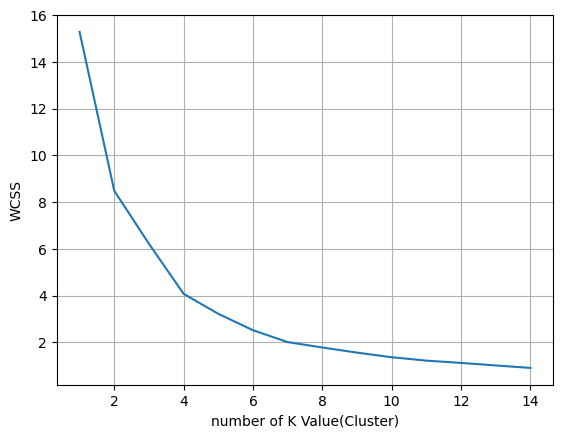

In [18]:
plt.plot(range(1,15),WCSS)
plt.xlabel("number of K Value(Cluster)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [ ]:
# Ten wykres nazywamy łokieć

In [ ]:
# Idealna liczba grup znajduje sie w punkcie przegiecia wykresu w łokciu wychodzi ze 5 to w pzybliżeniu najlepsza liczba grup.

In [21]:
kmeans = KMeans(n_clusters=5, max_iter=300, random_state=1) #kmeans to model dzielacy zbiór na 5 grup
clusters = kmeans.fit_predict(coordinates)#zbór punktów dzielimy na 5 grup i przecwiczymy model
labels  = kmeans.labels_#tablica ktora dla kazdej próbki przechowuje nr klastra lub grupy do ktorej probka została zakwalifikowana
centroids = kmeans.cluster_centers_#centralne punkty każdej grupy


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Tworzymy wykres symulujemy przypisanie każdego punktu z fragmentu płaszczyzny do grup. Dokładność z jaką 
# sie to robi przechowuje zmienna h x_min i x_max oraz y_min i y+max to wymairy płaszczyzny
# xx i yy to macierz wszystkich punktów z wykresu z to wynik predycji wykonany dla wszystkich punktów z tablic 
# xx yy czyli z całej płaszczyzny(z calego wycinka płaszczyzny)

In [25]:
h=0.001
x_min, x_max = coordinates['longitude'].min(), coordinates['longitude'].max()
y_min, y_max = coordinates['latitude'].min(), coordinates['latitude'].max()
xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])


C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


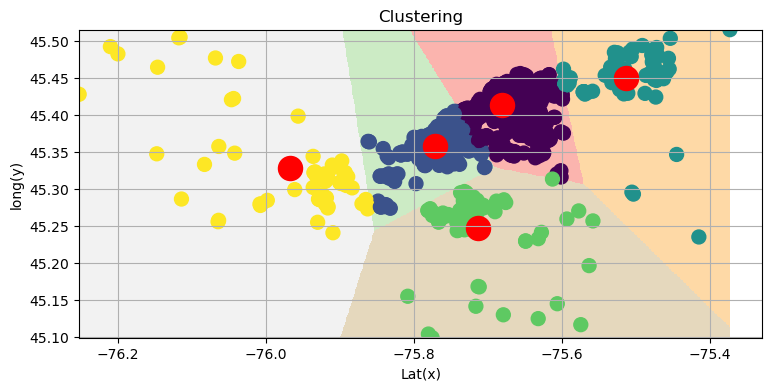

In [29]:
# inicjujemy rysowanie diagramu
plt.figure(1, figsize =(10,4))
plt.clf()
Z=Z.reshape(xx.shape)
# imshow pokazuje granice decyzyjne, do ktorego klasta dany punkt płaszczyzny zostałby zaliczony.
plt.imshow(Z, interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Pastel1, origin='lower')
# wywołanie kodu tylko dotąd wyrysuje coś w sylu mapki z granicami
plt.scatter(x=coordinates['longitude'], y = coordinates['latitude'],
           c= labels, s=100 )

plt.scatter(x=centroids[:,0], y = centroids[:,1],
           s=300, c='red' )

plt.ylabel('long(y)'), plt.xlabel('Lat(x)')
plt.grid()
plt.title("Clustering")
plt.show()







In [ ]:
# Dodaliśmy lokalizację centroidów mamy centralne lokalizacje gdzie mogą być biura serwisanta aby był blisko lokalizacji

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


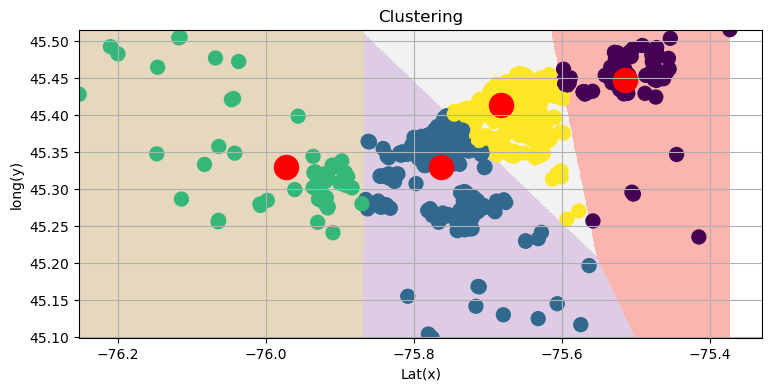

In [30]:
# teraz zobaczymy mapke dla 4 kalstrów:
kmeans = KMeans(n_clusters=4, max_iter=300, random_state=1) #kmeans to model dzielacy zbiór na 5 grup
clusters = kmeans.fit_predict(coordinates)#zbór punktów dzielimy na 5 grup i przecwiczymy model
labels  = kmeans.labels_#tablica ktora dla kazdej próbki przechowuje nr klastra lub grupy do ktorej probka została zakwalifikowana
centroids = kmeans.cluster_centers_#centralne punkty każdej grupy

h=0.001
x_min, x_max = coordinates['longitude'].min(), coordinates['longitude'].max()
y_min, y_max = coordinates['latitude'].min(), coordinates['latitude'].max()
xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

plt.figure(1, figsize =(10,4))
plt.clf()
Z=Z.reshape(xx.shape)
# imshow pokazuje granice decyzyjne, do ktorego klasta dany punkt płaszczyzny zostałby zaliczony.
plt.imshow(Z, interpolation='nearest',
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Pastel1, origin='lower')
# wywołanie kodu tylko dotąd wyrysuje coś w sylu mapki z granicami
plt.scatter(x=coordinates['longitude'], y = coordinates['latitude'],
           c= labels, s=100 )

plt.scatter(x=centroids[:,0], y = centroids[:,1],
           s=300, c='red' )

plt.ylabel('Long(y)'), plt.xlabel('Lat(x)')
plt.grid()
plt.title("Clustering")
plt.show()